# Display image in 8 64 128 256 gray levels

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_image(image, gray_level):
    global image_name

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

     # make it scaled to gray_level
    gray_image = np.floor(gray_image / (256 // gray_level)) * (256 // gray_level)
    
    cv2.imwrite(f"./images/quantized_images/{image_name}_gray_{gray_level}.jpg", gray_image)
    
    return gray_image

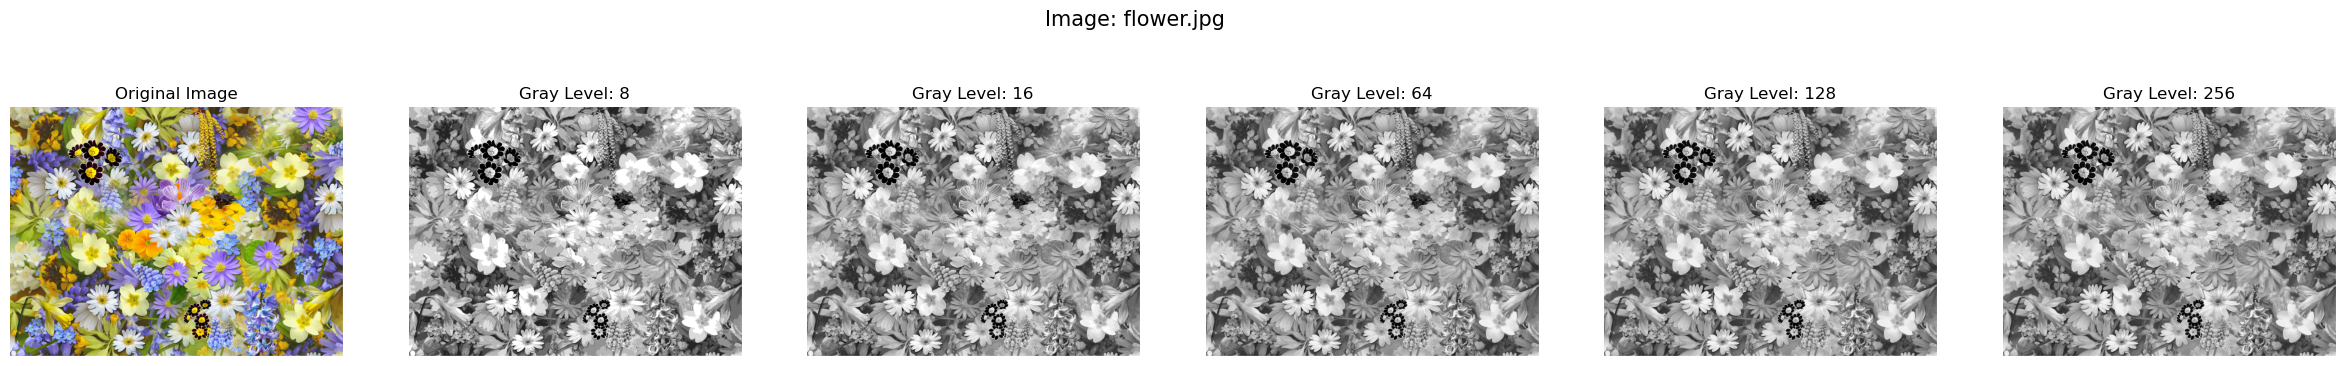

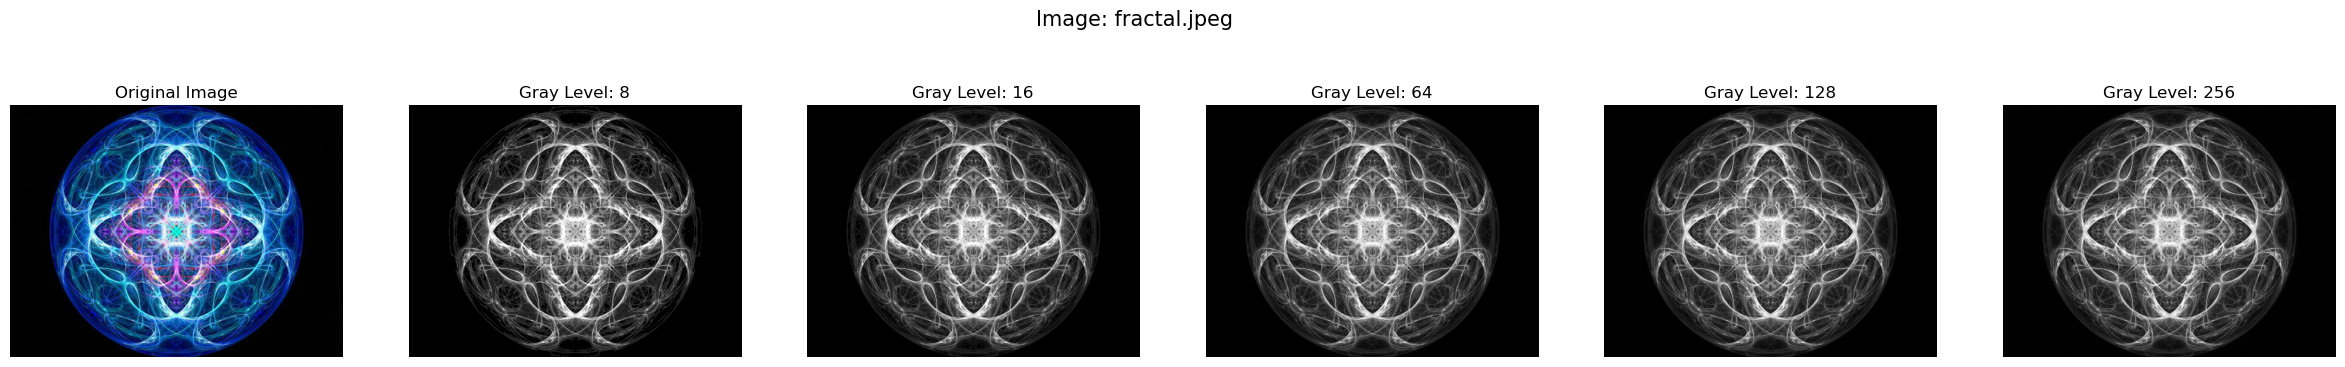

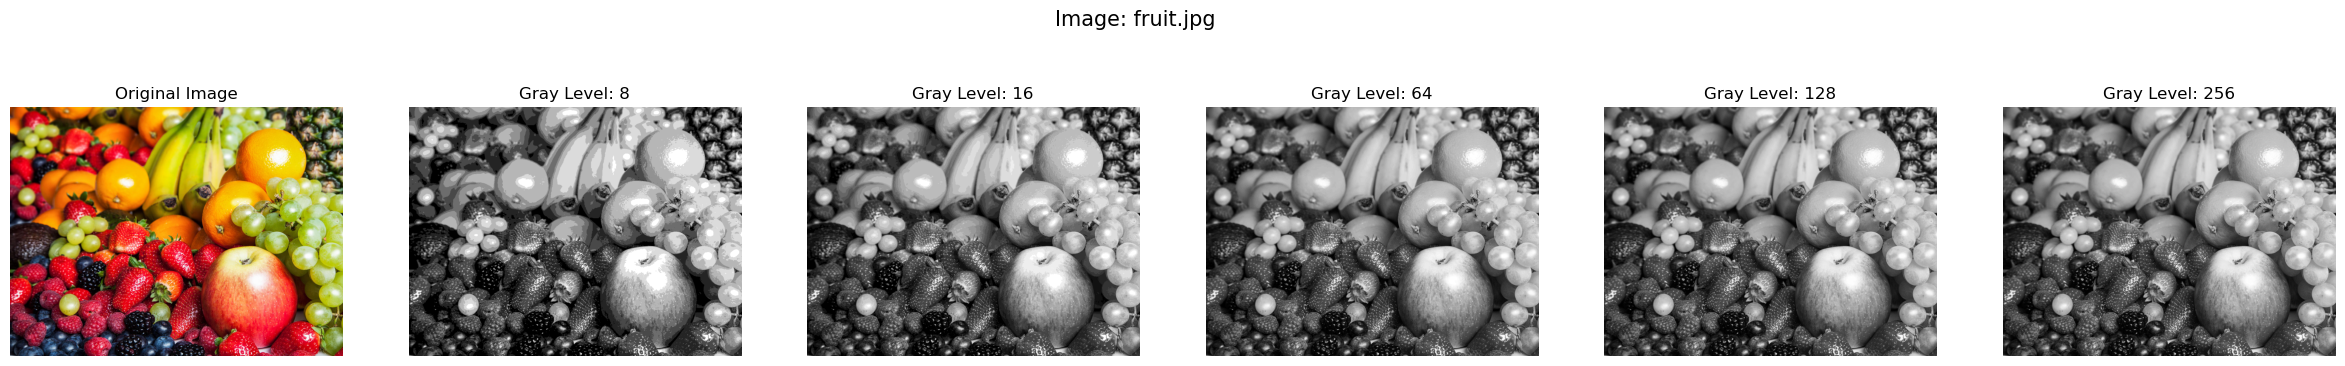

In [3]:
images_list = ["flower.jpg", "fractal.jpeg", "fruit.jpg"]
gray_levels = [8, 16, 64, 128, 256]

image_name = ""

# for image_name in images_list:
for image_path in images_list:

    image_name = image_path.split(".")[0]

    # plot configuration
    rows, columns = 1, len(gray_levels) + 1
    fig = plt.figure(figsize=(30, 4))
    fig.suptitle(f"Image: {image_path}", fontsize=15, y=1.05)

    # read image
    image = cv2.imread(f"images/{image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB

    # plot original image
    plt.subplot(rows, columns, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Original Image")

    for i in range(len(gray_levels)):
        gray_level = gray_levels[i]
        grayscale_img = display_image(image, gray_level)

        # plot quantized image
        plt.subplot(rows, columns, i + 2)
        plt.imshow(grayscale_img, cmap='gray')
        plt.axis('off')
        plt.title(f"Gray Level: {gray_level}")
    
    plt.savefig(f"images/quantized_images/{image_path}")
    plt.show()


# Enhance the 8-bit gray scale images

In [4]:
def enhance_img(image_path):

    image = cv2.imread(f"images/{image_path}")
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    L = 256

    for i in range(len(grayscale_img)):
        for j in range(len(grayscale_img[0])):
            if grayscale_img[i][j] <= L / 3:
                grayscale_img[i][j] = 5 * L / 6
            elif grayscale_img[i][j] <= 2 * L / 3:
                grayscale_img[i][j] = (-2 * grayscale_img[i][j]) + 384
            else:
                grayscale_img[i][j] = L / 6

    cv2.imwrite(f"./images/enhanced_images/{image_path}", grayscale_img)

    return grayscale_img


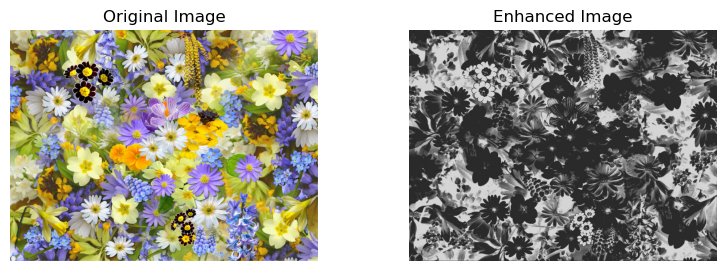

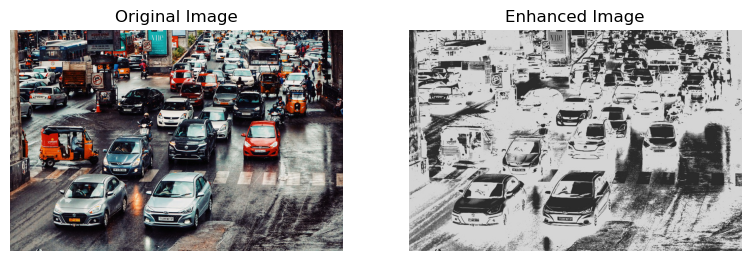

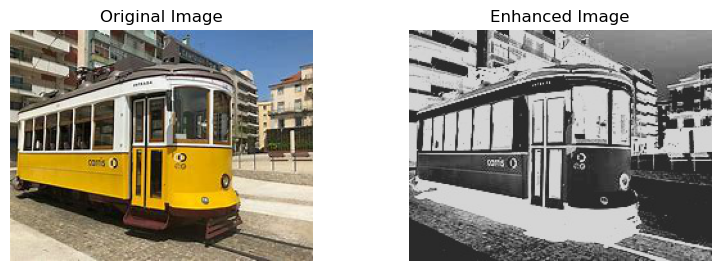

In [9]:
images_list = ["flower.jpg", "traffic.jpg", "tram.jpg"]

for image_path in images_list:
    fig = plt.figure(figsize=(30, 3))
    enhance_img(image_path)

    # plot original image
    plt.subplot(rows, columns, 1)

    image = cv2.imread(f"images/{image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Original Image")

    # plot enhanced image
    plt.subplot(rows, columns, 2)
    plt.imshow(cv2.imread(f"images/enhanced_images/{image_path}"), cmap='gray')
    plt.axis('off')
    plt.title(f"Enhanced Image")

    plt.show()


# Power-law transformation

In [32]:
def power_law_transform(image_path, c, gamma):

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_name = image_path.split("/")[-1].split(".")[0]

    gamma_corrected_img = np.array(255 * (image / 255) ** gamma, dtype='uint8')

    cv2.imwrite(f"./images/gamma_corrected_images/{image_name}-{c}-{gamma}.jpg", gamma_corrected_img)

    return gamma_corrected_img

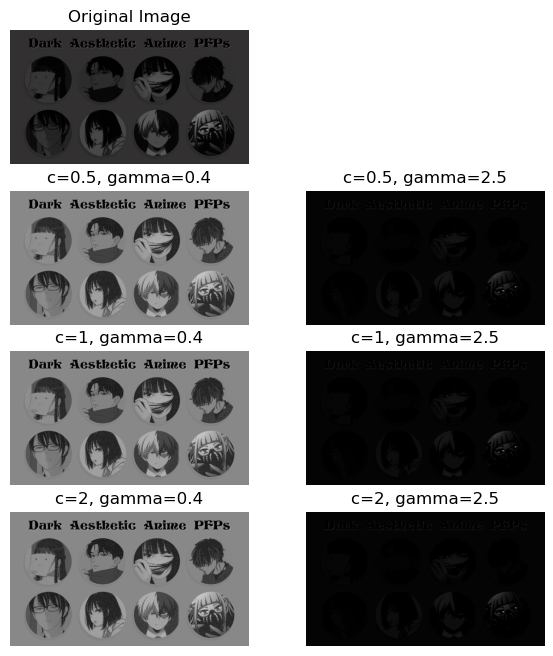

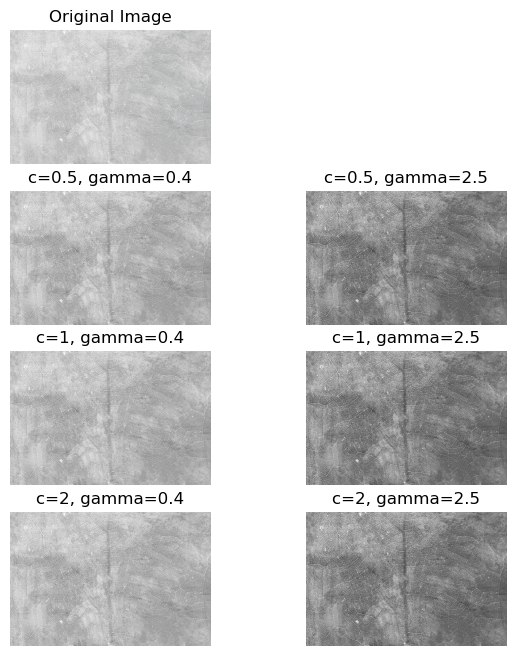

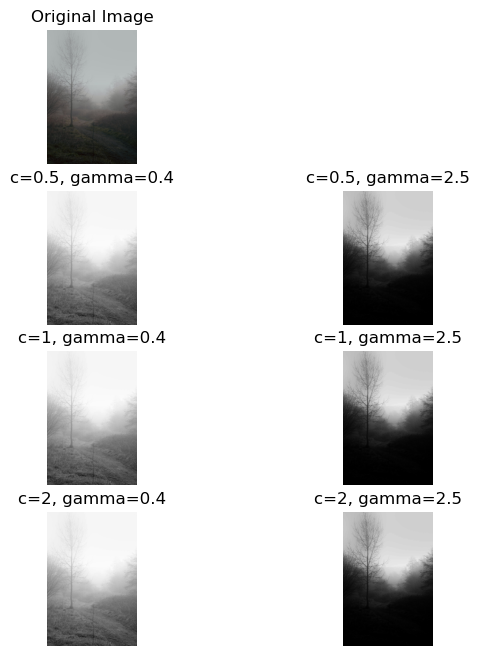

In [33]:
images_list = ["cartoon.jpg", "scenery1.jpg", "scenery2.jpg"]

for image_path in images_list:
    path = f"images/{image_path}"

    fig = plt.figure(figsize=(7, 8))
    row, col = 4, 2

    # plot original image
    plt.subplot(row, col, 1)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Original Image")

    c_list = [0.5, 1, 2]
    gamma_list = [0.4, 2.5]

    for c in c_list:
        for gamma in gamma_list:
            plt.subplot(row, col, c_list.index(c) * 2 + gamma_list.index(gamma) + 3)
            plt.imshow(power_law_transform(path, c, gamma), cmap='gray')
            plt.axis('off')
            plt.title(f"c={c}, gamma={gamma}")

    plt.savefig(f"images/gamma_corrected_images/{image_path}")
    plt.show()